# Research on car sales ads

You're an analyst at Crankshaft List. Hundreds of free advertisements for vehicles are published on your site every day.

You need to study data collected over the last few years and determine which factors influence the price of a vehicle. 

# Objectives

The objective of this project is to:
- Determine which factors influence the price of a vehicle.
- Apply Exploratory Data Analysis to a real-life analytical case study.

<hr>

 # Table of contents

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#open_the_data">Open the data file and study the general information</a></li>
        <li><a href="#data_preprocessing">Data preprocessing</a></li>
        <li><a href="#make_calculations">Make calculations and add them to the table</a></li>
        <li><a href="#carry_out_eda">Carry out exploratory data analysis</a></li>
        <li><a href="#overall_conclusion">Overall conclusion</a></li>
        <li><a href="#project_completion_checklist">Project completion checklist</a></li>
    </ol>
</div>
<br>
<hr>

<div id="open_the_data">
    <h2>Open the data file and study the general information</h2> 
</div>

We require the following libraries: *pandas* and *numpy* for data preprocessing and manipulation, *matplotlib* ,*seaborn* for visualization, and *plotly* for interactive data visualization.

In [1239]:
# import pandas and numpy for data preprocessing and manipulation
import pandas as pd
import numpy as np

# matplotlib for visualization
import matplotlib.pyplot as plt
%matplotlib inline

# seaborn for statistical data visualization
import seaborn as sns

# plotly for interactive visualization
#!pip install plotly
import plotly.express as px

# For Transforming date and time
import time
import datetime
from datetime import datetime

print('Project libraries has been successfully been imported!')

Project libraries has been successfully been imported!


In [1240]:
# read the data
try:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/vehicles_us.csv')
except:
    df = pd.read_csv('C:/Users/hotty/Desktop/Practicum by Yandex/Projects/Exploratory Data Analysis/Data/vehicles_us.csv')
print('Data has been read correctly!')

Data has been read correctly!


In [1241]:
# use the head() method to view the first 10 rows
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [1242]:
# check the datatype with info() method
print('The structure of our data is:')
df.info()
print()

# check the structure of our dataset
print('The shape of our data is', df.shape, 'with {} rows and {} columns'.format(df.shape[0], df.shape[1]))

The structure of our data is:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB

The shape of our data is (51525, 13) with 51525 rows and 13 columns


### Conclusion

From the general information about the dataset, we can see that `model_year`, `cylinders`, `odometer`, `paint_color` and `is_4wd` all have some missing data or 'NaNs'. We can also oberve that we have some `float` datatype which will have to be converted to `int`. 

<div id="data_preprocessing">
    <h2>Data preprocessing</h2> 
</div>

### Processing missing values

In [1243]:
# print the number of missing values per column
df.isnull().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [1244]:
# function to calculate the percentage of missing values
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [1245]:
# check missing data
missing_values_table(df)

Your selected dataframe has 13 columns.
There are 5 columns that have missing values.


,Missing Values,% of Total Values
is_4wd,25953,50.4
paint_color,9267,18.0
odometer,7892,15.3
cylinders,5260,10.2
model_year,3619,7.0


In [1246]:
# check the statistics of the numerical variables
df.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


From the check for missing values, we can see that we have a couple of columns with missing values which we have to preprocess. For instance, `is_4wd` has 50% of its values missing. This could either mean that the missing values represent vehicles that are not 4wd so we replace missing values with 0. 

In [1247]:
# replace 'NaNs' in the `is_4wd` column with 0
df['is_4wd'].fillna(0, inplace = True)
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,0.0,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28


In [1248]:
# check highest car price
df.loc[df['price'] == 375000]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
12504,375000,1999.0,nissan frontier,good,6.0,gas,115000.0,automatic,pickup,blue,1.0,2018-05-19,21


In [1249]:
# check highest odometer reading
df.loc[df['odometer'] == 990000]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
17869,59900,1964.0,chevrolet corvette,like new,NaN,gas,990000.0,automatic,convertible,red,0.0,2018-06-17,28
40729,4700,2013.0,chevrolet cruze,good,6.0,gas,990000.0,automatic,sedan,black,0.0,2018-05-02,4


Using the `describe()` method, we can observe some discrepancies with the data. For instance, the maximum value price is 375,000. A quick check of the row shows that the car with the highest price is a 1999 nissan frontier with 115000 odometer reading. This shows that we need to deal with outliers in the `price` column because this doesn't seem right. Since the number of missing values in `model_year` and `cylinders` is less than 10%, we would drop missing values in this columns. We can also fill `NaN` in the `paint_column` with a new category `others`. The `odometer` column contains significant outliers, so we will replace the missing value with the median of the column.

In [1250]:
# drop 'NaNs' in model_year and cylinders column
vehicles = df.dropna(subset=['model_year', 'cylinders']).reset_index(drop=True)
vehicles.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
2,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,0.0,2019-03-22,9
3,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28
4,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15


In [1251]:
# fill in missing values in the `paint_color` with others
vehicles['paint_color'] = vehicles['paint_color'].fillna(value='others')

In [1252]:
# fill missing values with the median of the column
med = vehicles['odometer'].median()

vehicles['odometer'] = vehicles['odometer'].fillna(med)
vehicles['odometer'].head()

0    145000.0
1    110000.0
2    113000.0
3     80903.0
4     57954.0
Name: odometer, dtype: float64

In [1253]:
# check for missing values in new dataframe
missing_values_table(vehicles)

Your selected dataframe has 13 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


Now we have dataset with no missing values. 

### Conclusion

In conclusion, we were able to identify missing values in our dataframe. We used a couple of methods for handling the missing values on a case-by-case basis. We dropped missing rows in `model_year` and `cylinders` column, replaced missing value in the `odometer` column using the median, and created new category for missing values in the `paint_color` column.

### Data type replacement

In [1254]:
# check data types
vehicles.dtypes

price             int64
model_year      float64
model            object
condition        object
cylinders       float64
fuel             object
odometer        float64
transmission     object
type             object
paint_color      object
is_4wd          float64
date_posted      object
days_listed       int64
dtype: object

We need to change some of the datatype from `float64` to `int64`. The columns where the data types need to be changes are `model_year`, `cylinders`, `odometer`, and `is_4wd`. This is because we can't have model year, veicle mileage or number of cylinders as a decimal point.

In [1255]:
# convert data to the required types
vehicles['model_year'] = vehicles['model_year'].astype('int64')
vehicles['cylinders'] = vehicles['cylinders'].astype('int64')
vehicles['odometer'] = vehicles['odometer'].astype('int64')
vehicles['is_4wd'] = vehicles['is_4wd'].astype('int64')

In [1256]:
# re-check data types
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43009 entries, 0 to 43008
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   price         43009 non-null  int64 
 1   model_year    43009 non-null  int64 
 2   model         43009 non-null  object
 3   condition     43009 non-null  object
 4   cylinders     43009 non-null  int64 
 5   fuel          43009 non-null  object
 6   odometer      43009 non-null  int64 
 7   transmission  43009 non-null  object
 8   type          43009 non-null  object
 9   paint_color   43009 non-null  object
 10  is_4wd        43009 non-null  int64 
 11  date_posted   43009 non-null  object
 12  days_listed   43009 non-null  int64 
dtypes: int64(6), object(7)
memory usage: 4.3+ MB


### Conclusion

We have been able to change the datatype from floating point to integer value by invoking the `astype()` method and the `int` argument. Now our data is ready for some analysis.

<div id="make_calculations">
    <h2>Make calculations and add them to the table</h2> 
</div>

Let's replace string values in the `condition` column with a numeric scale, and then calculate the day of the week, month, and year the ad was placed, the vehicle's age (in years) when the ad was placed, and the vehicle's average mileage per year.

In [1257]:
# replace string values in `condition` column
vehicles['condition'] = vehicles['condition'].replace(['new', 'like new', 'excellent', 'good', 'fair', 'salvage'], [5, 4, 3, 2, 1, 0])

In [1258]:
# change `date_posted` to datetime
vehicles['date_posted'] = pd.to_datetime(vehicles['date_posted'], format='%Y-%m-%d %H:%M:%S', errors='raise')

# add new features to table
vehicles['dow'] = vehicles['date_posted'].dt.dayofweek # create `day of week` ad was placed
vehicles['week'] = vehicles['date_posted'].dt.week # create `week` ad was placed
vehicles['month'] = vehicles['date_posted'].dt.month # create `month` ad was placed
vehicles['year'] = vehicles['date_posted'].dt.year # create `year` ad was placed

<ipython-input-1258-82c9168c6aa4>:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  vehicles['week'] = vehicles['date_posted'].dt.week # create `week` ad was placed


In [1259]:
# check new data frame
vehicles.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,dow,week,month,year
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,others,1,2018-06-23,19,5,25,6,2018
1,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,3,6,2,2019
2,1500,2003,ford f-150,1,8,gas,113000,automatic,pickup,others,0,2019-03-22,9,4,12,3,2019
3,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,1,14,4,2019
4,14990,2014,chrysler 300,3,6,gas,57954,automatic,sedan,black,1,2018-06-20,15,2,25,6,2018


In [1260]:
# make calculation
vehicles['age_in_years'] = vehicles['year'] - vehicles['model_year'] # vehicles year when ad was placed
vehicles['avg_miles_year'] = vehicles['odometer'] / vehicles['age_in_years']

In [1261]:
vehicles['avg_miles_year'].describe()

count    4.300800e+04
mean              inf
std               NaN
min      0.000000e+00
25%      1.053533e+04
50%      1.544233e+04
75%      2.301767e+04
max               inf
Name: avg_miles_year, dtype: float64

In [1262]:
# check for infinity after calculation in the average miles per year column
vehicles[np.isinf(vehicles['avg_miles_year'])]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,dow,week,month,year,age_in_years,avg_miles_year
17,13990,2018,hyundai elantra,3,4,gas,31932,automatic,sedan,red,0,2018-08-25,27,5,34,8,2018,0,inf
62,23300,2018,nissan frontier crew cab sv,2,6,gas,27493,other,pickup,others,1,2018-10-13,36,5,41,10,2018,0,inf
67,23800,2019,nissan frontier crew cab sv,2,6,gas,10899,other,pickup,silver,1,2019-02-28,30,3,9,2,2019,0,inf
86,39950,2018,chevrolet silverado,3,8,gas,18500,automatic,truck,others,1,2018-08-05,16,6,31,8,2018,0,inf
92,21500,2019,nissan frontier crew cab sv,2,6,gas,16168,other,pickup,white,0,2019-03-29,70,4,13,3,2019,0,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42859,28990,2018,ford f-150,3,8,gas,10622,automatic,truck,grey,1,2018-11-23,31,4,47,11,2018,0,inf
42884,27890,2018,ram 1500,3,8,gas,9446,automatic,truck,others,1,2018-05-06,39,6,18,5,2018,0,inf
42938,15999,2018,chevrolet malibu,3,4,gas,50502,automatic,sedan,black,0,2018-07-28,8,5,30,7,2018,0,inf
42939,33990,2019,ram 1500,3,8,gas,9000,automatic,truck,white,1,2019-01-25,36,4,4,1,2019,0,inf


We noticed that we have `NaN` as our standard deviation and `inf` as the mean. This is because the `age_in_years` is 0. Trying to calculate the `avg_miles_years` with this value leads to `inf` or `NaN`. One way to deal with this is to drop those rows (about 1938 of them) or work around this by converting our `infs` to 0 so we can work with other variables in those rows.

In [1263]:
# convert inf to NaN and change NaN's to 0 of type 'int'
vehicles['avg_miles_year'] = pd.to_numeric(vehicles['avg_miles_year'], errors='coerce')
vehicles['avg_miles_year'] = vehicles['avg_miles_year'].replace(np.inf, int(float(0)))
vehicles['avg_miles_year'] = vehicles['avg_miles_year'].fillna(0).astype(int)
vehicles['avg_miles_year'] = vehicles['avg_miles_year'].astype('int64') 

In [1264]:
vehicles.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,dow,week,month,year,age_in_years,avg_miles_year
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,others,1,2018-06-23,19,5,25,6,2018,7,20714
1,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,3,6,2,2019,6,18333
2,1500,2003,ford f-150,1,8,gas,113000,automatic,pickup,others,0,2019-03-22,9,4,12,3,2019,16,7062
3,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,1,14,4,2019,2,40451
4,14990,2014,chrysler 300,3,6,gas,57954,automatic,sedan,black,1,2018-06-20,15,2,25,6,2018,4,14488


In [1265]:
# check for duplicates
duplicate = vehicles[vehicles.duplicated()]
duplicate

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,dow,week,month,year,age_in_years,avg_miles_year


Looks like there are no duplicate. So our data is good.

In [1266]:
vehicles.dtypes

price                      int64
model_year                 int64
model                     object
condition                  int64
cylinders                  int64
fuel                      object
odometer                   int64
transmission              object
type                      object
paint_color               object
is_4wd                     int64
date_posted       datetime64[ns]
days_listed                int64
dow                        int64
week                       int64
month                      int64
year                       int64
age_in_years               int64
avg_miles_year             int64
dtype: object

### Conclusion

We have been able to make calculations and add to the table. We created new features from our calculation such as day of the week, `dow`, week, `week`, month, `month`, year, `year` ad was placed. We used those features to determine the vehicle's age in years `age_in_years`, and the average miles per year, `avg_miles_year`.

<div id="carry_out_eda">
    <h2>Carry out exploratory data analysis</h2> 
</div>

#### Check correlation among numerical variables

We can start our analysis by checking the correlation of different variable to the price, and determine several linear relationship to the price.

In [1267]:
# correlation of several variables to price
vehicles[['price', 'model_year', 'odometer', 'days_listed', 'age_in_years', 'avg_miles_year', 'cylinders', 'condition']].corr()

,price,model_year,odometer,days_listed,age_in_years,avg_miles_year,cylinders,condition
price,1.000000,0.434491,-0.390359,-0.001103,-0.433254,0.170770,0.295579,0.222394
model_year,0.434491,1.000000,-0.436010,-0.006295,-0.997300,0.390542,-0.148040,0.282918
odometer,-0.390359,-0.436010,1.000000,0.004797,0.434623,0.169123,0.082703,-0.277292
days_listed,-0.001103,-0.006295,0.004797,1.000000,0.007133,-0.004014,0.002502,-0.005643
age_in_years,-0.433254,-0.997300,0.434623,0.007133,1.000000,-0.395756,0.147848,-0.282090
avg_miles_year,0.170770,0.390542,0.169123,-0.004014,-0.395756,1.000000,-0.046620,0.070983
cylinders,0.295579,-0.148040,0.082703,0.002502,0.147848,-0.046620,1.000000,-0.063130
condition,0.222394,0.282918,-0.277292,-0.005643,-0.282090,0.070983,-0.063130,1.000000


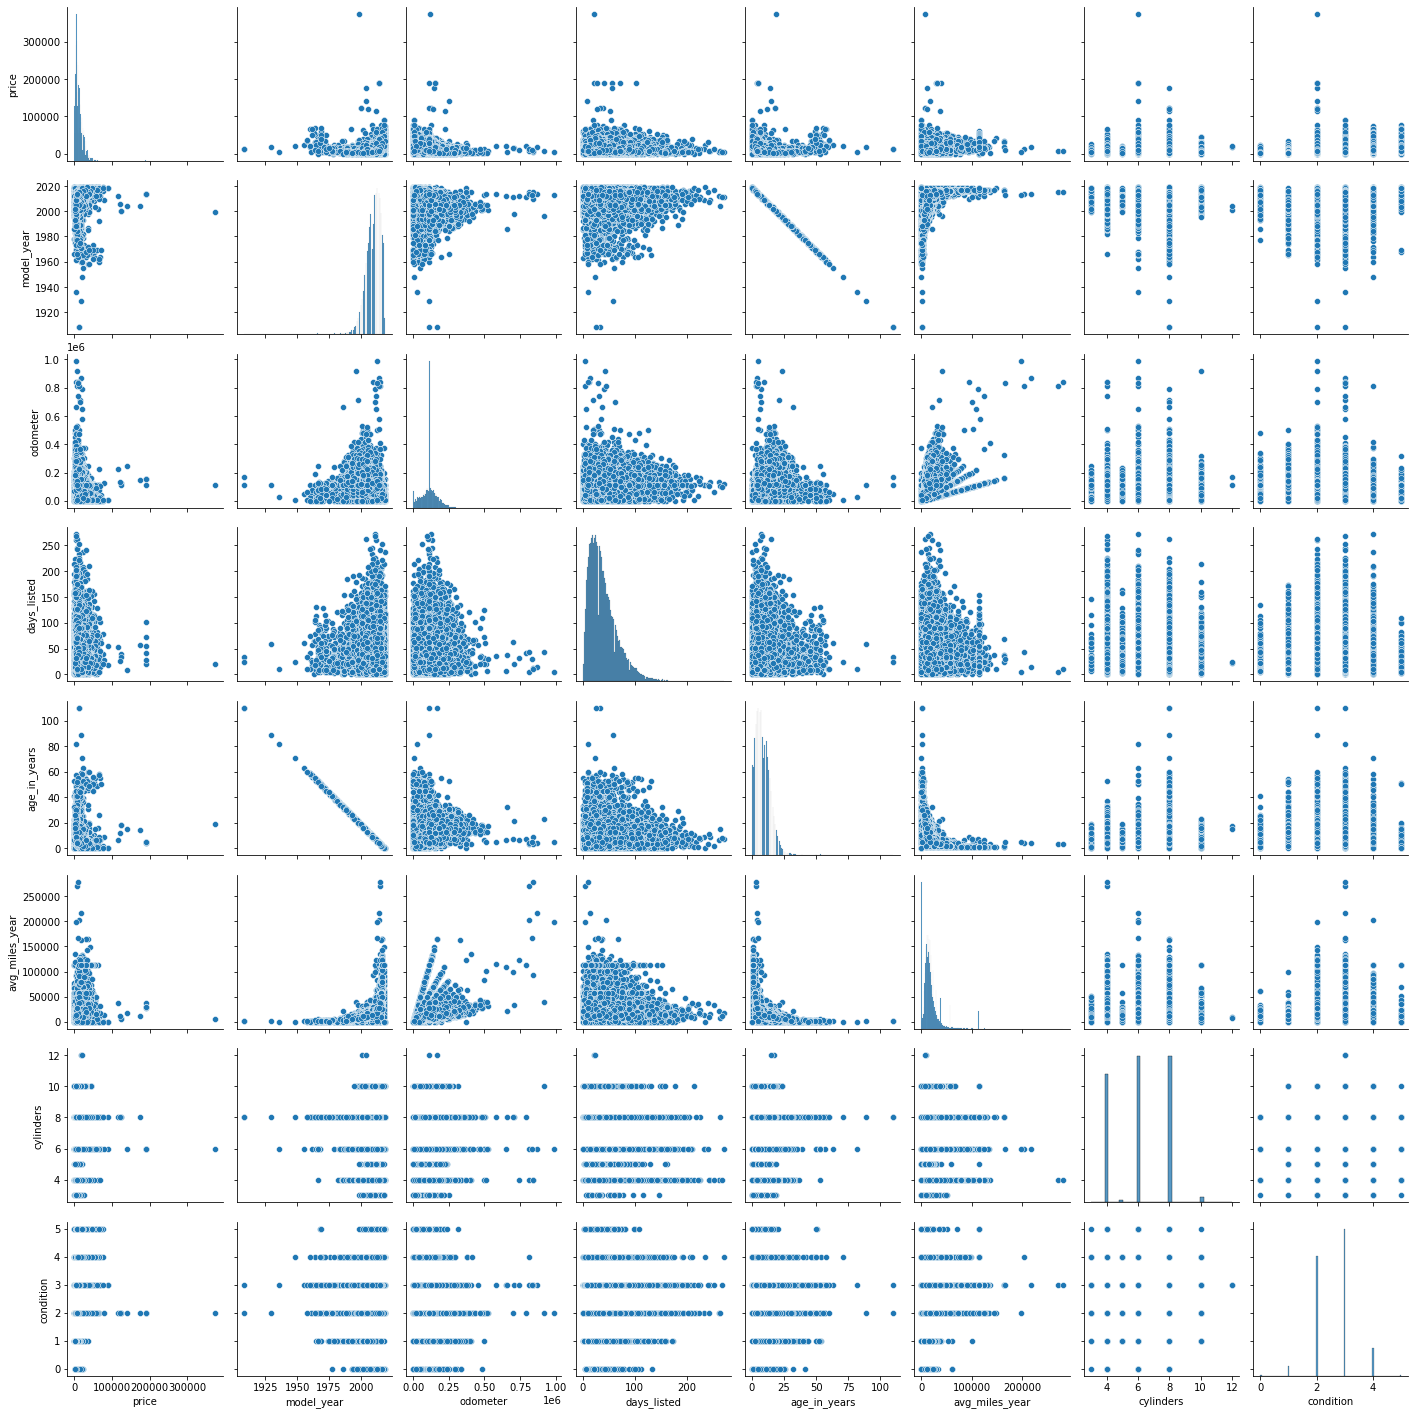

In [1269]:
# scatter matrix
sns.pairplot(vehicles[['price', 'model_year', 'odometer', 'days_listed', 'age_in_years', 'avg_miles_year', 'cylinders', 'condition']])

The correlation of several numerical variables and the scatter plot shows that our dataset contains some outliers. We can plot histograms for the following parameters: price, vehicle's age when the ad was placed, mileage, number of cylinders, and condition, and study how outliers affect the form and readability of the histograms.  

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'model_year'}>,
        <AxesSubplot:title={'center':'odometer'}>],
       [<AxesSubplot:title={'center':'days_listed'}>,
        <AxesSubplot:title={'center':'age_in_years'}>,
        <AxesSubplot:title={'center':'avg_miles_year'}>],
       [<AxesSubplot:title={'center':'cylinders'}>,
        <AxesSubplot:title={'center':'condition'}>, <AxesSubplot:>]],
      dtype=object)

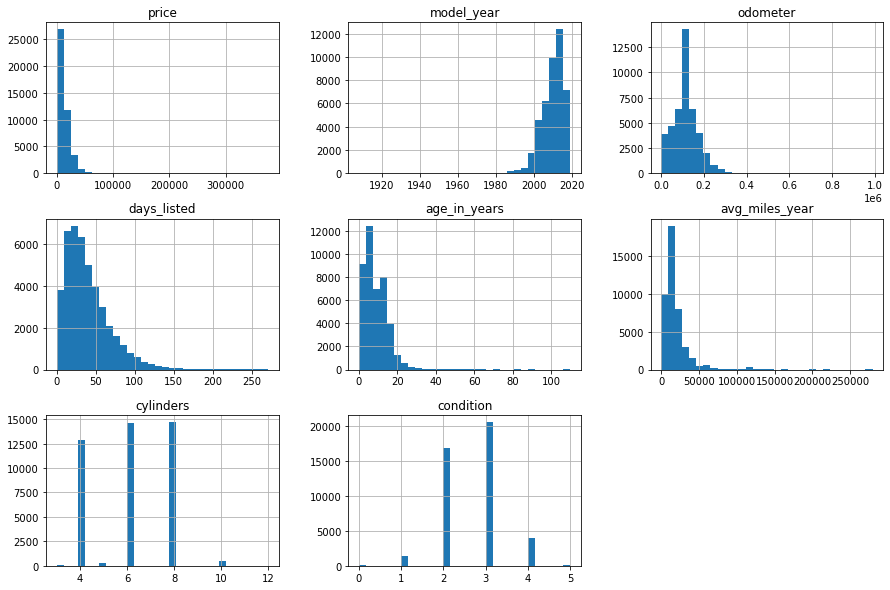

In [1320]:
# histogram of selected variables
vehicles[['price', 'model_year', 'odometer', 'days_listed', 'age_in_years', 'avg_miles_year', 'cylinders', 'condition']].hist(bins=30, figsize=(15, 10))

Let's take a closer look at each of these variables

<AxesSubplot:>

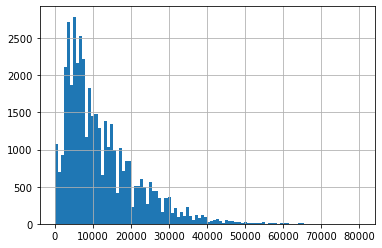

In [1280]:
# histogram of vehicle's price
vehicles['price'].hist(bins=100, range=[0, 80000])

<AxesSubplot:>

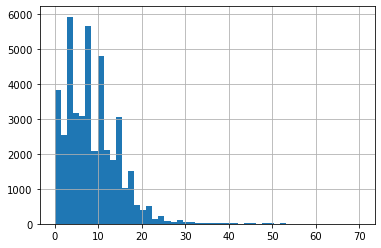

In [1295]:
# histogram of vehicle's age in years
vehicles['age_in_years'].hist(bins=50, range=[0, 70])

<AxesSubplot:>

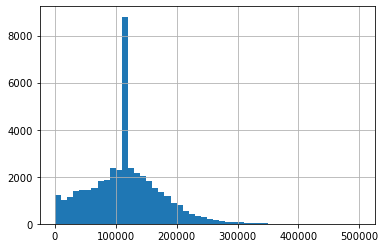

In [1285]:
# histogram of vehicle's mileage
vehicles['odometer'].hist(bins=50, range=[0, 500000])

The above three chart shows that the distribution is right-skewed, and there are extreme higher values at the right of the histogram. We can conclude that there are outliers just by looking at the distribution of the data. 

<AxesSubplot:>

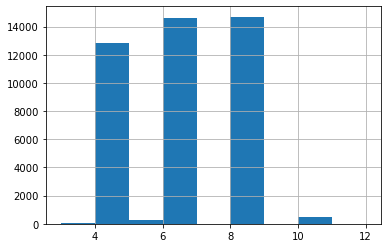

In [1287]:
vehicles['cylinders'].hist(bins=9)

<AxesSubplot:>

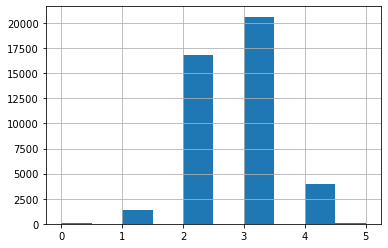

In [1293]:
vehicles['condition'].hist(bins=10)

In [1362]:
# statistics of the unfiltered data
vehicles[['price', 'age_in_years', 'odometer', 'cylinders', 'condition']].describe()

,price,age_in_years,odometer,cylinders,condition
count,43009.000000,43009.000000,43009.000000,43009.000000,43009.000000
mean,12168.670604,8.545397,114967.597038,6.126276,2.637053
std,10019.342590,6.277680,59882.186015,1.659540,0.713040
min,1.000000,0.000000,0.000000,3.000000,0.000000
25%,5000.000000,4.000000,78840.000000,4.000000,2.000000
50%,9000.000000,7.000000,113000.000000,6.000000,3.000000
75%,16900.000000,12.000000,146345.000000,8.000000,3.000000
max,375000.000000,110.000000,990000.000000,12.000000,5.000000


From the initial visualization to detect outliers, we can observe that the `price`, `age_in_years`, and `odometer` variables have outliers. Looking at the `price` variable, it is easy to detect outliers resulting from incorrect data. The minimum price is 1 and the maximum price is 375,000. Similarly, in the `age_in_years` variable, the mean age is $\approx$ 9years, while the maximum vehicle age is 110 years giving a standard deviation of 6. There is clearly an outlier in this variable. We can see that there is so much outlier in the data that we have to remove them before we can proceed with analysis. In some other cases, the outlier may not be so visible thus we have to use some mathematical technique to identify and remove them. One approach to detecting outlier is to use the Z-score which is calculated by subtracting each value from the mean of the data and dividing it by the standard deviation.
\begin{equation}
    z = \frac {x - \mu}{\sigma}
\end{equation}

We will determine the upper limits of outliers, remove the outliers and store them in a separate DataFrame, and continue your work with the filtered data. 

In [1347]:
# upper limit of the outliers
iqr = vehicles[['price', 'age_in_years', 'odometer']].quantile(0.75) - vehicles[['price', 'age_in_years', 'odometer']].quantile(0.25)
vehicles_outliers_upper = vehicles[['price', 'age_in_years', 'odometer']].quantile(0.75) + iqr*1.5
vehicles_outliers_lower = vehicles[['price', 'age_in_years', 'odometer']].quantile(0.25) - iqr*1.5
print('The inter-quartile range are - price: {}, age in years: {}, and odometer: {}'.format(*iqr))
print()
print('The upper bound are - price: {}, age in years: {}, and odometer: {}'.format(*vehicles_outliers_upper))
print()
print('The lower bound are - price: {}, age in years: {}, and odometer: {}'.format(*vehicles_outliers_lower))

The inter-quartile range are - price: 11900.0, age in years: 8.0, and odometer: 67505.0

The upper bound are - price: 34750.0, age in years: 24.0, and odometer: 247602.5

The lower bound are - price: -12850.0, age in years: -8.0, and odometer: -22417.5


We use the `stats` package in scipy to determine the Z-score and filter the data to obtain the distribution where the mean is 0 and the standard deviation is 1. 

In [1354]:
from IPython.display import Image
Image(url="https://sphweb.bumc.bu.edu/otlt/MPH-Modules/PH717-QuantCore/PH717-Module6-RandomError/Normal%20Distribution%20deviations.png", width = 400, height = 200)

In [1355]:
# import stats from scipy
from scipy import stats

# finding z-score in price
stats.zscore(vehicles['price'])

array([-0.27633577, -0.66558739, -1.06481983, ..., -0.82028996,
       -0.47046254, -0.58574091])

In [1356]:
# z-score for price, age and odometer given as an array
stats.zscore(vehicles[['price', 'age_in_years', 'odometer']])

array([[-0.27633577, -0.24617621,  0.50153066],
       [-0.66558739, -0.40547259, -0.08295714],
       [-1.06481983,  1.18749115, -0.03285818],
       ...,
       [-0.82028996,  0.07241653,  0.21763659],
       [-0.47046254, -0.56476896,  0.41090165],
       [-0.58574091, -0.72406533, -0.03285818]])

In [1357]:
# filtered dataset
vehicles_filtered = vehicles[(np.abs(stats.zscore(vehicles[['price', 'age_in_years', 'odometer']])) < 3).all(axis=1)]
vehicles_filtered

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,dow,week,month,year,age_in_years,avg_miles_year
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,others,1,2018-06-23,19,5,25,6,2018,7,20714
1,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,3,6,2,2019,6,18333
2,1500,2003,ford f-150,1,8,gas,113000,automatic,pickup,others,0,2019-03-22,9,4,12,3,2019,16,7062
3,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,1,14,4,2019,2,40451
4,14990,2014,chrysler 300,3,6,gas,57954,automatic,sedan,black,1,2018-06-20,15,2,25,6,2018,4,14488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43004,9249,2013,nissan maxima,4,6,gas,88136,automatic,sedan,black,0,2018-10-03,37,2,40,10,2018,5,17627
43005,2700,2002,honda civic,0,4,gas,181500,automatic,sedan,white,0,2018-11-14,22,2,46,11,2018,16,11343
43006,3950,2009,hyundai sonata,3,4,gas,128000,automatic,sedan,blue,0,2018-11-15,32,3,46,11,2018,9,14222
43007,7455,2013,toyota corolla,2,4,gas,139573,automatic,sedan,black,0,2018-07-02,71,0,27,7,2018,5,27914


array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'age_in_years'}>],
       [<AxesSubplot:title={'center':'odometer'}>, <AxesSubplot:>]],
      dtype=object)

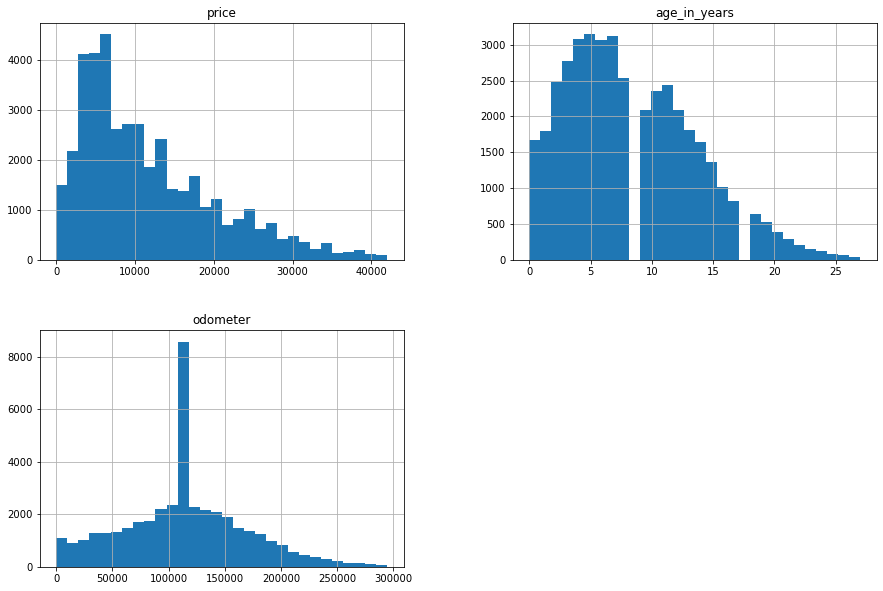

In [1358]:
# plot of histogram for filtered data
vehicles_filtered[['price', 'age_in_years', 'odometer']].hist(bins=30, figsize=(15, 10))

The intuition behind Z-score is to find the distribution of data where the mean is 0 and the standard deviation is 1. While calculating the Z-score, we re-scaled and centered the data and look for data points that are too far from zero which will be treated as outliers using a threshold of 3 or -3. If the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers. Before the Z-score calculation, we had extremely high values to the right of the histogram, and the distribution was rightly-skewed. After removing outliers using the Z-score technique, the distribution is almost a normal distribution. 

In [1363]:
# statistics of the unfiltered data
vehicles_filtered[['price', 'age_in_years', 'odometer']].describe()

,price,age_in_years,odometer
count,41754.000000,41754.000000,41754.000000
mean,11717.179887,8.270681,114313.088375
std,8609.081838,5.374979,55262.531289
min,1.000000,0.000000,0.000000
25%,5000.000000,4.000000,80181.500000
50%,9000.000000,7.000000,113000.000000
75%,16499.000000,12.000000,146000.000000
max,42000.000000,27.000000,294500.000000


We can study how many days advertisements were displayed `days_listed`.

In [1224]:
# calculate the average price per brand
brand_stat = vehicles.pivot_table(index='type', values = 'price', aggfunc = 'mean')
print(brand_stat)

                    price
type                     
SUV          11178.140898
bus          16638.800000
convertible  14346.324675
coupe        14270.477749
hatchback     6809.197183
mini-van      8179.467641
offroad      14322.945055
other        11298.687805
pickup       16221.422318
sedan         7007.699437
truck        16713.765605
van          10378.938547
wagon         9060.028103


array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

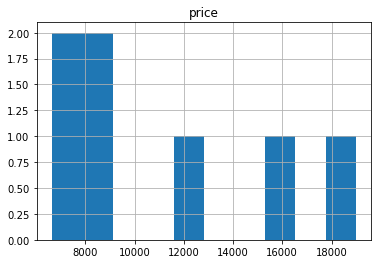

In [1223]:
brand_stat.hist()

In [1236]:
vehicles.loc[vehicles['cylinders'] == 12]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,dow,week,month,year,age_in_years,avg_miles_year
10572,18000,2001,ram 2500,3,12,diesel,167500,manual,truck,silver,1,2018-08-05,22,6,31,8,2018,17,9852
36834,20000,2004,ford f350 super duty,3,12,diesel,113000,automatic,truck,grey,1,2019-03-29,24,4,13,3,2019,15,7533


In [1209]:
vehicles.pivot_table(index=['type', 'model'], columns ='cylinders', aggfunc='size')

cylinders                3     4    5      6      8   10  12
type  model                                                 
SUV   acura tl          NaN   NaN  NaN    2.0    NaN NaN NaN
      bmw x5            NaN   NaN  NaN  174.0   38.0 NaN NaN
      buick enclave     NaN   1.0  NaN  221.0    1.0 NaN NaN
      cadillac escalade NaN   NaN  NaN    1.0  255.0 NaN NaN
      chevrolet cruze   NaN   1.0  NaN    NaN    NaN NaN NaN
...                      ..   ...  ...    ...    ...  ..  ..
wagon toyota prius      NaN   1.0  NaN    NaN    NaN NaN NaN
      toyota rav4       NaN   3.0  NaN    NaN    NaN NaN NaN
      toyota sienna     NaN   NaN  NaN    8.0    NaN NaN NaN
      volkswagen jetta  NaN  16.0  3.0    NaN    NaN NaN NaN
      volkswagen passat NaN  17.0  NaN    4.0    NaN NaN NaN

[451 rows x 7 columns]

In [1149]:
# compare brand

count     43009.00000
mean      17760.27743
std       15458.95783
min           0.00000
25%        9642.00000
50%       14453.00000
75%       21333.00000
max      279365.00000
Name: avg_miles_year, dtype: float64

In [ ]:
# compare color

In [ ]:
# compare gas guzzler - v6 or v8 or i4

<div id="overall_conclusion">
    <h2>Overall conclusion</h2> 
</div>

<div id="project_completion_checklist">
    <h2>Project completion checklist</h2> 
</div>

Mark the completed tasks with 'x'. Then press Shift+Enter.

- [x]  file opened
- [ ]  files explored (first rows printed, info() method)
- [ ]  missing values determined
- [ ]  missing values filled in
- [ ]  clarification of the discovered missing values provided
- [ ]  data types converted
- [ ]  explanation of which columns had the data types changed and why
- [ ]  calculated and added to the table: day of the week, month, and year the ad was placed
- [ ]  calculated and added to the table: the vehicle's age (in years) when the ad was placed
- [ ]  calculated and added to the table: the vehicle's average mileage per year
- [ ]  the following parameters investigated: price, vehicle's age when the ad was placed, mileage, number of cylinders, and condition
- [ ]  histograms for each parameter created
- [ ]  task completed: "Determine the upper limits of outliers, remove the outliers and store them in a separate DataFrame, and continue your work with the filtered data."
- [ ]  task completed: "Use the filtered data to plot new histograms. Compare them with the earlier histograms (the ones that included outliers). Draw conclusions for each histogram."
- [ ]  task completed: "Study how many days advertisements were displayed (days_listed). Plot a histogram. Calculate the mean and median. Describe the typical lifetime of an ad. Determine when ads were removed quickly, and when they were listed for an abnormally long time.  "
- [ ]  task completed: "Analyze the number of ads and the average price for each type of vehicle. Plot a graph showing the dependence of the number of ads on the vehicle type. Select the two types with the greatest number of ads. "
- [ ]  task completed: "What factors impact the price most? Take each of the popular types you detected at the previous stage and study whether the price depends on age, mileage, condition, transmission type, and color. For categorical variables (transmission type and color), plot box-and-whisker charts, and create scatterplots for the rest. When analyzing categorical variables, note that the categories must have at least 50 ads; otherwise, their parameters won't be valid for analysis.  "
- [ ]  each stage has a conclusion
- [ ]  overall conclusion drawn